Streaming output truncated to the last 5000 lines.
[4, 3, 8, 0, 2, 5, 1, 7, 6] -> تناقض: 5
[4, 3, 2, 8, 0, 1, 5, 7, 6] -> تناقض: 10
[4, 3, 2, 7, 0, 8, 1, 5, 6] -> تناقض: 8
[4, 3, 8, 2, 1, 0, 5, 6, 7] -> تناقض: 10
[4, 3, 2, 7, 8, 0, 5, 1, 6] -> تناقض: 6
[4, 3, 0, 2, 1, 8, 7, 5, 6] -> تناقض: 6
[4, 3, 0, 2, 8, 1, 7, 5, 6] -> تناقض: 6
[4, 3, 0, 7, 2, 1, 8, 6, 5] -> تناقض: 6
[4, 3, 1, 2, 0, 7, 8, 5, 6] -> تناقض: 10
[4, 3, 2, 8, 0, 5, 1, 7, 6] -> تناقض: 10
[4, 3, 0, 2, 5, 8, 6, 7, 1] -> تناقض: 3
[4, 3, 2, 0, 7, 8, 1, 5, 6] -> تناقض: 5
[4, 3, 0, 7, 2, 8, 1, 5, 6] -> تناقض: 8
[4, 3, 7, 8, 2, 1, 0, 5, 6] -> تناقض: 8
[4, 3, 0, 2, 8, 5, 6, 7, 1] -> تناقض: 6
[4, 3, 2, 8, 1, 7, 0, 5, 6] -> تناقض: 6
[4, 3, 0, 2, 1, 8, 6, 5, 7] -> تناقض: 5
[4, 3, 0, 7, 2, 8, 5, 1, 6] -> تناقض: 5
[4, 3, 2, 8, 7, 0, 1, 5, 6] -> تناقض: 6
[4, 3, 1, 2, 8, 0, 6, 7, 5] -> تناقض: 6
[4, 3, 7, 2, 0, 8, 1, 5, 6] -> تناقض: 4
[4, 3, 2, 8, 0, 5, 7, 1, 6] -> تناقض: 7
[4, 3, 8, 0, 2, 1, 7, 5, 6] -> تناقض: 5
[4, 3, 2, 0, 8, 5, 1, 7, 

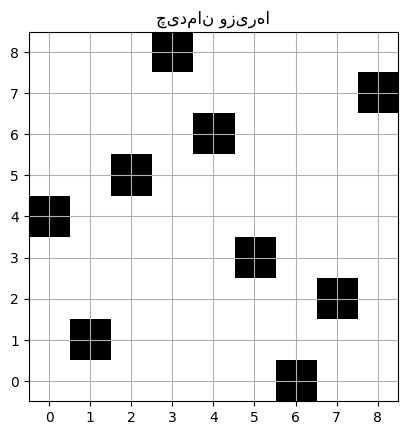

In [32]:
import numpy as np
import random
import matplotlib.pyplot as plt

# تعداد وزیران
N = 8

# ایجاد جمعیت اولیه
def create_population(size):
    return [random.sample(range(N), N) for _ in range(size)]

# محاسبه تناقض‌ها
def fitness(individual):
    conflicts = 0
    for i in range(len(individual)):
        for j in range(i + 1, len(individual)):
            if abs(individual[i] - individual[j]) == abs(i - j):  # بررسی حمله دیagonal
                conflicts += 1
    return -conflicts  # ما می‌خواهیم حداقل تناقض‌ها را داشته باشیم

# انتخاب والدین
def select_parents(population):
    weights = [fitness(ind) for ind in population]
    total_fitness = sum(weights)
    if total_fitness <= 0:  # اگر همه افراد دارای تناقضات بالا هستند
        return random.sample(population, 2)  # تصادفی انتخاب کنید
    return random.choices(population, weights=weights, k=2)

# ترکیب والدین
def crossover(parent1, parent2):
    point = random.randint(1, len(parent1)-1)
    child = parent1[:point] + [x for x in parent2 if x not in parent1[:point]]
    return child

# جهش
def mutate(individual, mutation_rate=0.01):
    if random.random() < mutation_rate:
        idx1, idx2 = random.sample(range(len(individual)), 2)
        individual[idx1], individual[idx2] = individual[idx2], individual[idx1]  # تعویض دو وزیر
        print(f"جهش: وزیران در موقعیت‌های {idx1} و {idx2} تعویض شدند.")
    return individual

# نمایش چیدمان وزیرها
def plot_board(solution):
    board = np.zeros((N, N))
    for col, row in enumerate(solution):
        board[row, col] = 1  # قرار دادن وزیر در تخته

    plt.imshow(board, cmap='binary')
    plt.xticks(range(N))
    plt.yticks(range(N))
    plt.gca().invert_yaxis()
    plt.grid()
    plt.title("چیدمان وزیرها")
    plt.show()

# الگوریتم ژنتیک
def genetic_algorithm(population_size, generations):
    population = create_population(population_size)
    print("جمعیت اولیه:")
    for ind in population:
        print(ind, "-> تناقض:", -fitness(ind))

    for generation in range(generations):
        new_population = []
        for _ in range(population_size):
            parent1, parent2 = select_parents(population)
            child = crossover(parent1, parent2)
            child = mutate(child)
            new_population.append(child)

        population = new_population

        print(f"\nنسل {generation + 1}:")
        for ind in population:
            print(ind, "-> تناقض:", -fitness(ind))

        # بررسی وجود راه حل
        if any(fitness(ind) == 0 for ind in population):
            print("یک چیدمان بی‌نقص پیدا شد.")
            break

    # بهترین فرد
    best_individual = max(population, key=fitness)
    print("بهترین فرد انتخاب شد:", best_individual, "-> تناقض:", -fitness(best_individual))
    return best_individual, -fitness(best_individual)

# اجرا
best_solution, best_value = genetic_algorithm(population_size=100, generations=1000)
print("\nبهترین راه حل:", best_solution)
print("تعداد تناقض‌ها:", best_value)

# نمایش چیدمان بهترین راه حل
if best_value == 0:
    plot_board(best_solution)
else:
    print("هیچ چیدمان بی‌نقصی پیدا نشد.")